# Getting Started in Machine Learning
### Code for Cover Picture
This notebook contains the code to generate the circular dendrogram used for the cover picture on the book:

Getting Started in Machine Learning: Easy Recipes for Python 3, Scikit-Learn, Jupyter (2019) by Bella Romeo, Sherwood Forest Books, Los Angeles, CA, USA, ISBN-13: 978-0-9966860-6-8

(c) Copyright 2019.

<font style="font-size:xx-small; font-family:courier;">

    This notebook is free software: you can redistribute it and/or modify
    it under the terms of the GNU General Public License as published by
    the Free Software Foundation, either version 3 of the License, or
    (at your option) any later version.

    This program is distributed in the hope that it will be useful,
    but WITHOUT ANY WARRANTY; without even the implied warranty of
    MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.  See the
    GNU General Public License for more details.

    You should have received a copy of the GNU General Public License
    along with this program. If not, see <https://www.gnu.org/licenses/>.

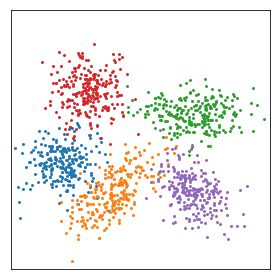

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

nclouds=5
A=[[[.5,0],[0,.5]], 
   [[.75,.5],[.5,.75]], 
   [[1,0],[0,.25]], 
   [[.5,0],[0,.5]], 
   [[.5,-.2],[-.2,.5]]]

centers=np.array([[2,4],[4,3],[7,6],[3,7],[7,3]])
xcenters=centers.T[0]
ycenters=centers.T[1]
xx=[]; yy=[]; YCLOUD=[]
npts=250
for j in range(nclouds):
    center=[xcenters[j],ycenters[j]]
    xy=np.random.multivariate_normal(center,A[j],npts)
    x,y=zip(*xy)
    plt.scatter(x,y,marker=".", s=15)
    xx=xx+list(x); yy=yy+list(y)
    YCLOUD=YCLOUD+npts*[j]
X=np.array([xx,yy]).T
XCLOUD=X
YCLOUD=np.array(YCLOUD)
plt.xlim([0,10])
plt.ylim([0,10])
plt.xticks([]); plt.yticks([])
fig=plt.gcf()
fig.set_size_inches(4,4)
fig.tight_layout()
#fig.savefig("Gaussian-clouds.pdf")

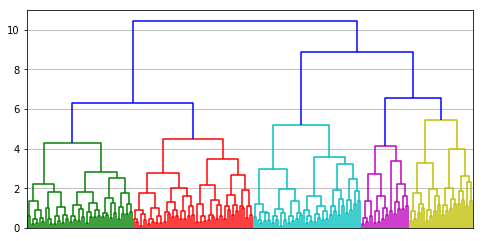

In [7]:
from scipy.cluster.hierarchy import dendrogram, linkage
Z=linkage(XCLOUD, method="complete")
d=dendrogram(Z,7,truncate_mode="level",show_leaf_counts=True, color_threshold=6)
fig=plt.gcf()
fig.set_size_inches(8,4)
plt.grid(axis="y")
plt.xticks([])
#plt.yticks([])
xmin,xmax=plt.xlim()
#plt.plot([xmin,xmax],[30,30],c="k",lw=2)
plt.show()
fig.tight_layout()
#fig.savefig("dendrogram-agglom-clustering.pdf")

In [8]:
from math import pi
def circularize(ax, d):
    xcoords=d["icoord"]
    ycoords=d["dcoord"]
    n=len(xcoords); 
    xmax=np.amax(xcoords)
    ymax=np.amax(ycoords)
    colors=d["color_list"]
    def transform(P):
        x,y=P
        theta=2*pi*x/xmax
        r=ymax-y
        xprime=r*np.cos(theta)
        yprime=r*np.sin(theta)
        return(xprime,yprime)
    def expandsegment(P,Q):
        x,y=P
        x2,y2=Q
        npts=10
        xvals=list(np.linspace(x,x2,npts))
        yvals=npts*[y]
        points=zip(xvals,yvals)
        return [transform(R) for R in points]
        
    def drawline(P,Q,col):
        x,y=P
        u,v=Q
        ax.plot([x,u],[y,v], c=col)
    def drawarc(P,Q, col):
        pts=expandsegment(P,Q)
        R=pts[:-1]
        S=pts[1:]
        for A,B in zip(R,S):
            drawline(A,B, col)
        
        
    def drawlink(j,col):
        xvals=xcoords[j]
        yvals=ycoords[j]
        #uvals=[]; vvals=[]
        A,B,C,D=zip(xvals,yvals)
        P1,P2,P3,P4=[transform(P) for P in zip(xvals,yvals)]
        drawline(P1,P2, col)
        drawline(P3,P4, col)
        drawarc(B,C, col)
        
    for j in range(n):
        drawlink(j,colors[j])
    
    ax.scatter(0,0,marker="o",s=100,c=colors[-1])
        
    #plt.plot(xvals,yvals)

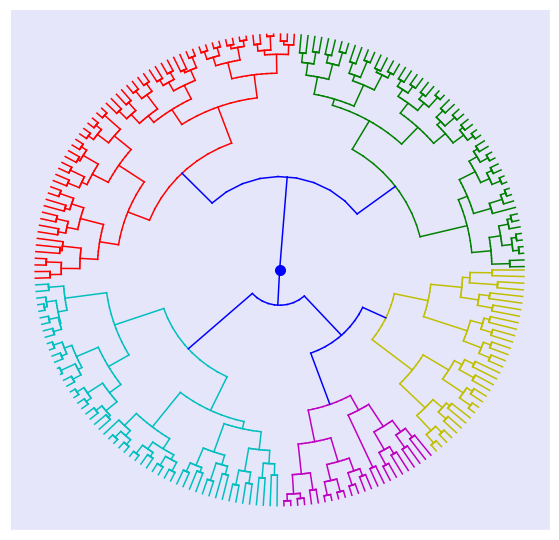

In [6]:
fig,ax=plt.subplots(nrows=1,ncols=1)
circularize(ax,d)
ax.set_xticks([])
ax.set_yticks([])
color="lavender"
ax.set_facecolor(color) # E6E6FA or 230 230 250
ax.spines["top"].set_color(color)
ax.spines["bottom"].set_color(color)
ax.spines["left"].set_color(color)
ax.spines["right"].set_color(color)

fig.tight_layout()
fig.set_size_inches(8,8)
fig.savefig("circ-dend.pdf")